## Solar plat output prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from matplotlib import rcParams
# apply some styling
plt.style.use("ggplot")
rcParams['figure.figsize'] = (16, 8)

In [2]:
weather_df = pd.read_csv('weather.csv')
weather_df.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Pashan, Pune, MH, India",2025-01-01,29.0,16.1,22.0,28.9,16.1,22.0,15.8,70.6,...,18.5,8,10,2025-01-01T07:07:20,2025-01-01T18:09:40,0.05,Clear,Clear conditions throughout the day.,clear-day,"43063099999,43111099999,remote,43067099999,430..."
1,"Pashan, Pune, MH, India",2025-01-02,30.8,14.9,22.1,29.3,14.9,21.9,13.6,63.1,...,18.8,8,10,2025-01-02T07:07:40,2025-01-02T18:10:17,0.08,Clear,Clear conditions throughout the day.,clear-day,"43063099999,43111099999,remote,43060099999"
2,"Pashan, Pune, MH, India",2025-01-03,29.3,12.9,21.0,27.7,12.9,20.7,10.4,56.5,...,19.2,8,10,2025-01-03T07:07:59,2025-01-03T18:10:54,0.12,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43063099999,43111099999,remote,43060099999"
3,"Pashan, Pune, MH, India",2025-01-04,29.8,11.2,20.0,28.5,11.2,19.8,8.6,51.8,...,19.4,8,10,2025-01-04T07:08:17,2025-01-04T18:11:31,0.15,Clear,Clear conditions throughout the day.,clear-day,"43063099999,43111099999,remote,43067099999,430..."
4,"Pashan, Pune, MH, India",2025-01-05,30.1,12.2,20.7,28.5,12.2,20.4,10.2,54.5,...,18.9,8,10,2025-01-05T07:08:33,2025-01-05T18:12:08,0.19,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"43063099999,43111099999,remote,43067099999,430..."


In [3]:
# Drop unused columns
weather_df = weather_df.drop(['name', 'feelslikemax', 'feelslikemin','feelslike', 'severerisk','moonphase', 'icon', 'stations', 'description', 'preciptype', 'winddir', 'sealevelpressure', 'visibility','uvindex', 'snow', 'snowdepth', 'windgust', 'windspeed', 'conditions'], axis=1)
weather_df.tail(10)

,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,sunrise,sunset
142,2025-05-23,25.6,22.8,23.7,22.8,94.9,11.9,100,12.50,98.3,33.6,2.7,2025-05-23T05:58:55,2025-05-23T19:04:34
143,2025-05-24,25.3,21.3,23.3,21.9,92.1,8.0,100,12.50,100.0,42.5,3.7,2025-05-24T05:58:43,2025-05-24T19:04:57
144,2025-05-25,27.1,22.2,23.8,22.9,94.5,29.0,100,25.00,100.0,44.1,3.7,2025-05-25T05:58:32,2025-05-25T19:05:20
145,2025-05-26,27.1,22.1,23.6,22.8,95.4,34.0,100,16.67,99.0,77.5,6.8,2025-05-26T05:58:22,2025-05-26T19:05:42
146,2025-05-27,24.6,20.5,22.9,22.3,96.7,36.0,100,16.67,97.5,70.8,6.1,2025-05-27T05:58:12,2025-05-27T19:06:05
147,2025-05-28,29.0,22.4,24.7,22.5,88.1,7.0,100,4.17,86.8,173.5,14.9,2025-05-28T05:58:04,2025-05-28T19:06:28
148,2025-05-29,31.0,23.0,26.1,22.3,80.5,0.1,100,4.17,86.6,198.0,17.0,2025-05-29T05:57:57,2025-05-29T19:06:50
149,2025-05-30,31.6,22.7,26.1,21.2,75.7,0.3,100,12.50,52.1,298.0,25.8,2025-05-30T05:57:50,2025-05-30T19:07:13
150,2025-05-31,31.6,22.6,26.3,20.2,70.4,0.0,0,0.00,76.8,311.8,27.1,2025-05-31T05:57:45,2025-05-31T19:07:35
151,2025-06-01,28.1,22.0,25.0,20.4,76.5,1.0,100,4.17,85.8,273.6,23.4,2025-06-01T05:57:41,2025-06-01T19:07:57


In [4]:
weather_df.isnull().sum()

datetime          0
tempmax           0
tempmin           0
temp              0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
cloudcover        0
solarradiation    0
solarenergy       0
sunrise           0
sunset            0
dtype: int64

In [5]:
def str_to_datetime(s):
    format_string = "%Y-%m-%d %H:%M:%S"
    s = s.replace('T', ' ')
    return datetime.strptime(s, format_string)
def str_to_date(s):
    format_string = "%Y-%m-%d"
    return datetime.strptime(s, format_string)
def tm_diff_min(sset, srise):
    diff = str_to_datetime(sset) - str_to_datetime(srise)
    return round(diff.seconds / 60, 2)


In [6]:
weather_df['solartime'] = weather_df.apply(lambda row: tm_diff_min(row['sunset'], row['sunrise']), axis=1)
# Now sunrise and sunset times can be dropped
weather_df = weather_df.drop(['sunrise', 'sunset'], axis=1)

In [7]:
weather_df.to_csv('cleaned_weather.csv')

In [8]:
# read the solar plant generation data
solar_df = pd.read_csv('plant_output.csv')
solar_df.head(10)

,Plant,Time,Daily yield(kWh),Real-time power(kW),Daily feed-in energy(kWh),Energy purchased today(kWh)
0,PlantID OwnerID,20250101,11.7,2.433,NaN,NaN
1,PlantID OwnerID,20250102,12.5,2.570,NaN,NaN
2,PlantID OwnerID,20250103,12.7,2.724,NaN,NaN
3,PlantID OwnerID,20250104,10.5,2.646,NaN,NaN
4,PlantID OwnerID,20250105,11.1,2.507,NaN,NaN
5,PlantID OwnerID,20250106,10.1,2.177,NaN,NaN
6,PlantID OwnerID,20250107,11.3,2.419,NaN,NaN
7,PlantID OwnerID,20250108,10.9,2.331,NaN,NaN
8,PlantID OwnerID,20250109,11.0,2.359,NaN,NaN
9,PlantID OwnerID,20250110,9.8,1.962,NaN,NaN


In [9]:
# drop unused columns
solar_df = solar_df.drop(['Plant', 'Real-time power(kW)', 'Daily feed-in energy(kWh)', 'Energy purchased today(kWh)'], axis=1)

solar_df.isnull().sum()

Time                0
Daily yield(kWh)    0
dtype: int64

In [10]:
solar_df.describe()

,Time,Daily yield(kWh)
count,1.520000e+02,152.000000
mean,2.025032e+07,12.557895
std,1.445936e+02,3.499490
min,2.025010e+07,0.000000
25%,2.025021e+07,10.975000
50%,2.025032e+07,13.250000
75%,2.025042e+07,15.100000
max,2.025060e+07,21.600000


In [11]:
# Both weather and solar df are date aligned
data_df = weather_df
data_df['output'] = solar_df['Daily yield(kWh)']
data_df.tail(10)

,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,solartime,output
142,2025-05-23,25.6,22.8,23.7,22.8,94.9,11.9,100,12.50,98.3,33.6,2.7,785.65,0.5
143,2025-05-24,25.3,21.3,23.3,21.9,92.1,8.0,100,12.50,100.0,42.5,3.7,786.23,5.6
144,2025-05-25,27.1,22.2,23.8,22.9,94.5,29.0,100,25.00,100.0,44.1,3.7,786.80,5.9
145,2025-05-26,27.1,22.1,23.6,22.8,95.4,34.0,100,16.67,99.0,77.5,6.8,787.33,5.8
146,2025-05-27,24.6,20.5,22.9,22.3,96.7,36.0,100,16.67,97.5,70.8,6.1,787.88,1.7
147,2025-05-28,29.0,22.4,24.7,22.5,88.1,7.0,100,4.17,86.8,173.5,14.9,788.40,9.6
148,2025-05-29,31.0,23.0,26.1,22.3,80.5,0.1,100,4.17,86.6,198.0,17.0,788.88,14.7
149,2025-05-30,31.6,22.7,26.1,21.2,75.7,0.3,100,12.50,52.1,298.0,25.8,789.38,16.7
150,2025-05-31,31.6,22.6,26.3,20.2,70.4,0.0,0,0.00,76.8,311.8,27.1,789.83,5.5
151,2025-06-01,28.1,22.0,25.0,20.4,76.5,1.0,100,4.17,85.8,273.6,23.4,790.27,9.4


In [12]:
data_df.isnull().sum()

datetime          0
tempmax           0
tempmin           0
temp              0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
cloudcover        0
solarradiation    0
solarenergy       0
solartime         0
output            0
dtype: int64

In [13]:
# Rows with 0 output - due to no connection to electricity grid 
data_df[data_df['output'] == 0]

,datetime,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,solartime,output
134,2025-05-15,33.3,23.8,26.8,22.2,77.2,0.3,100,4.17,59.0,225.7,19.3,780.37,0.0


In [14]:
# Remove entries with known 0 output
data_df = data_df[~(data_df['output'] == 0)]

### Data cleaning summary
- Unused columns are removed
- Null items are removed
- New column added to the weather DF named `solartime` = `sunset` - `sunrise` which indicates the time sunlight was available. 

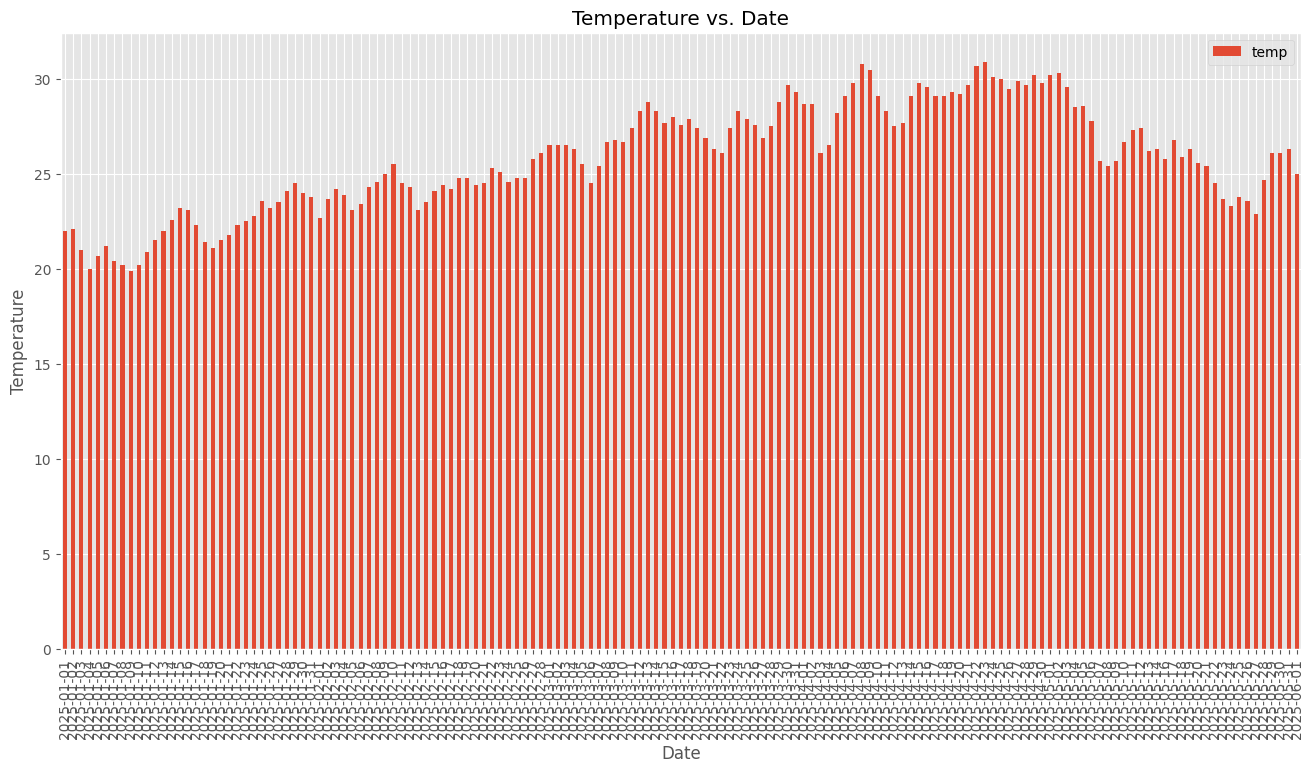

In [15]:
# Histogram of variables
data_df.plot(x='datetime', y ='temp', kind='bar')
plt.title(f"Temperature vs. Date")
plt.xlabel(f"Date")
plt.xticks(rotation=90)
plt.ylabel("Temperature")
plt.show()

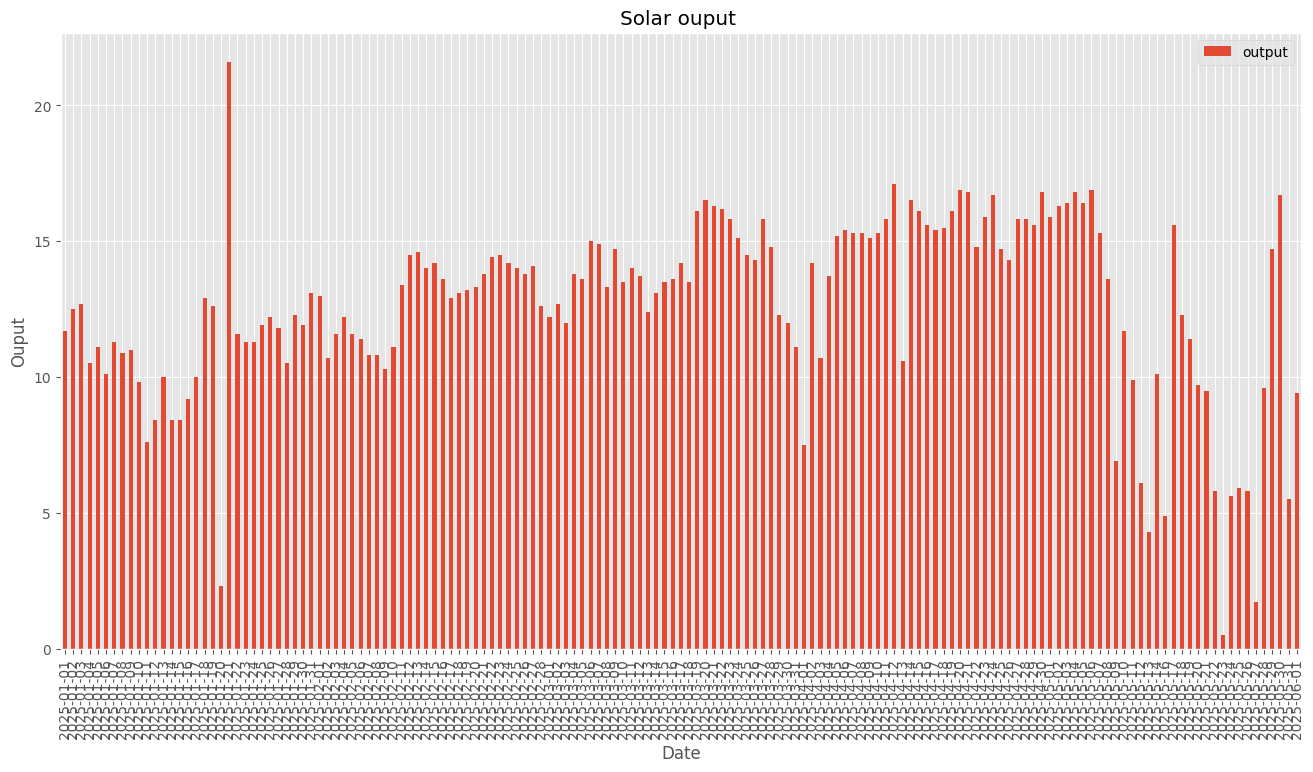

In [16]:
# Histogram of variables
data_df.plot(x='datetime', y ='output', kind='bar')
plt.title(f"Solar ouput ")
plt.xlabel(f"Date")
plt.xticks(rotation=90)
plt.ylabel("Ouput")
plt.show()

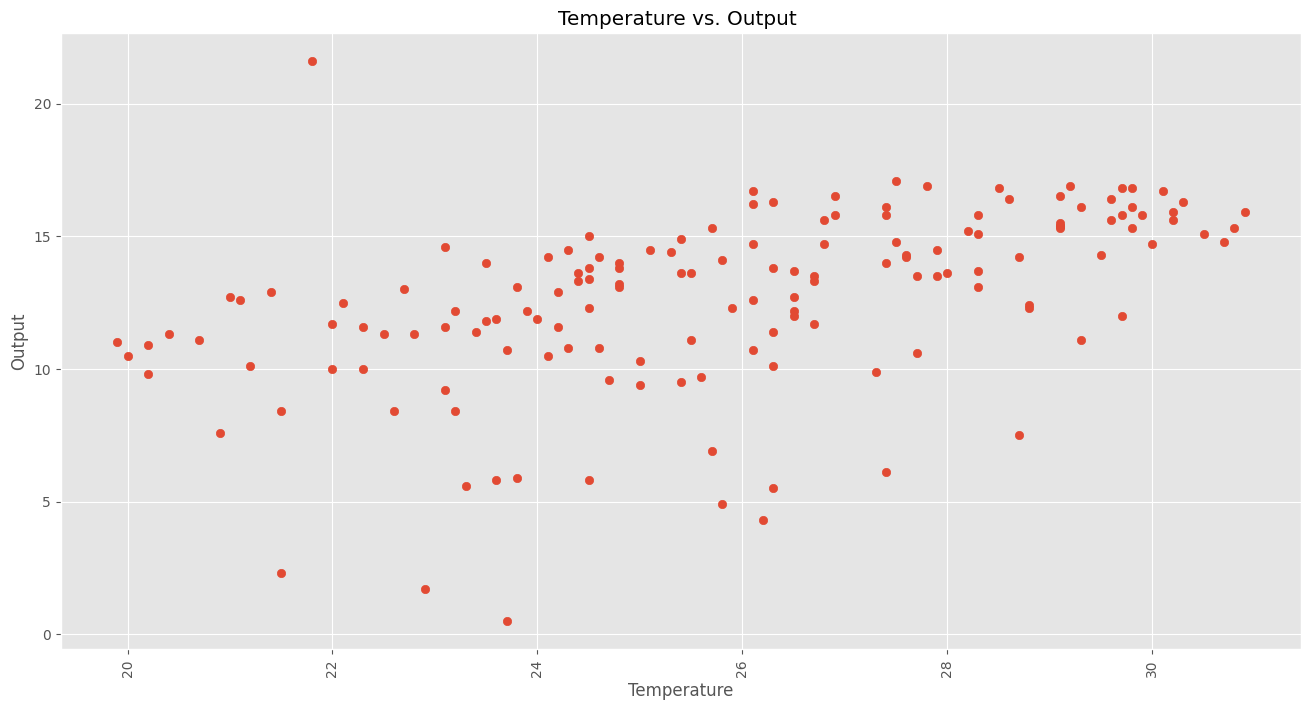

In [17]:
#data_df.plot(x='temp', y ='output', kind='bar')
plt.scatter(data_df['temp'], data_df['output'])
plt.title(f"Temperature vs. Output ")
plt.xlabel(f"Temperature")
plt.xticks(rotation=90)
plt.ylabel("Output")
plt.show()

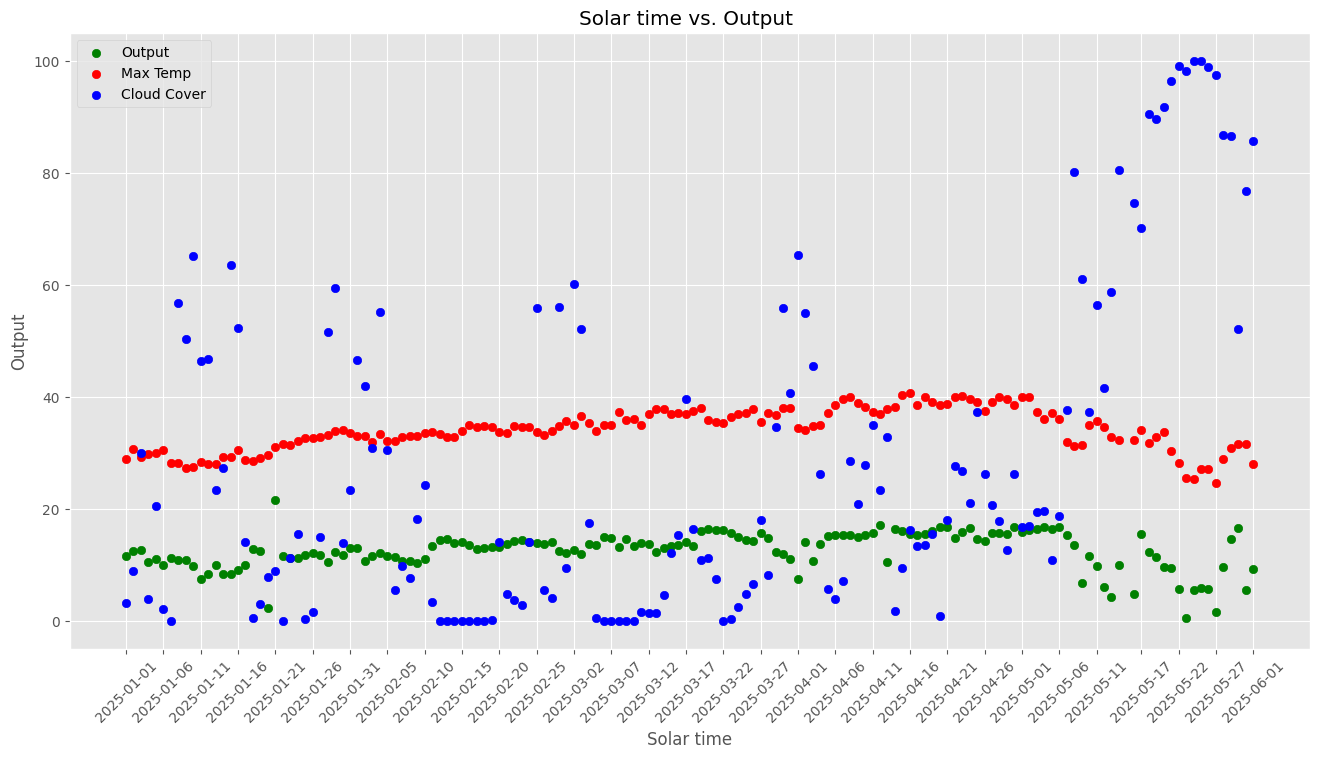

In [18]:
from datetime import timedelta
from matplotlib.dates import date2num
from matplotlib.ticker import FixedLocator
#plt.scatter(data_df['solartime'], data_df['output'])
dates = date2num(pd.to_datetime(data_df['datetime']))
plt.xticks(dates, data_df['datetime'], rotation=45)

plt.scatter(dates, data_df['output'], c='green')
plt.scatter(dates, data_df['tempmax'], c='red')
plt.scatter(dates, data_df['cloudcover'], c='blue')
plt.title(f"Solar time vs. Output ")
plt.legend(['Output', 'Max Temp', 'Cloud Cover'])
plt.xlabel(f"Solar time")
plt.xticks(rotation=45)
ax = plt.gca()
ax.xaxis.set_major_locator(FixedLocator(dates[np.arange(0, len(dates), 5)]))  # Show every 5th date
plt.ylabel("Output")
plt.show()

In [19]:
#sns.pairplot(data_df)


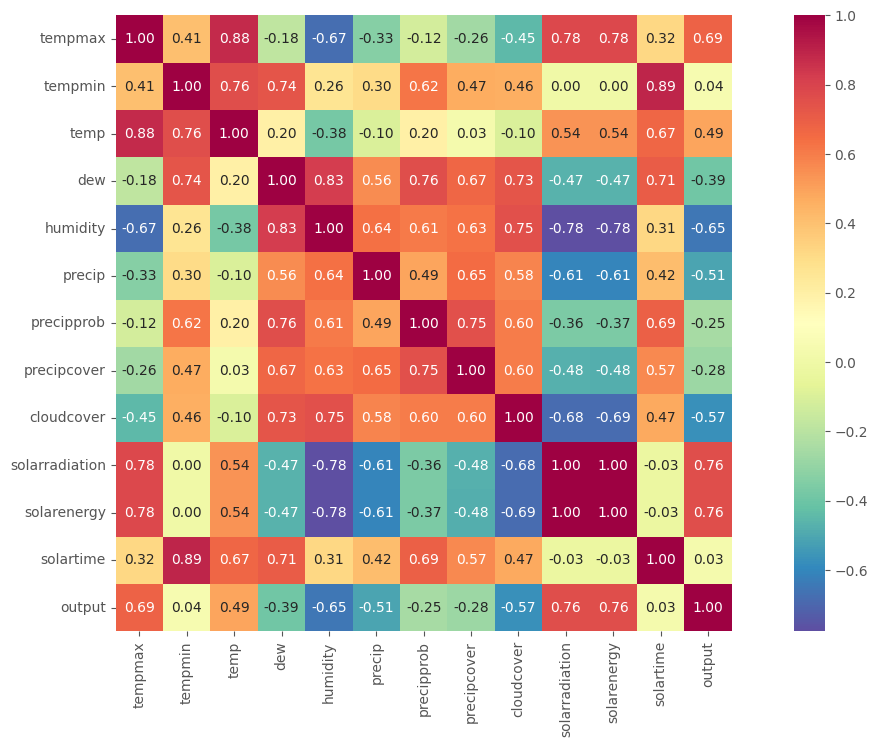

In [20]:
corr_df = data_df.drop(['datetime'], axis=1) 
corrmat = corr_df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=corr_df.columns, 
                 xticklabels=corr_df.columns, 
                 cmap="Spectral_r")
plt.show()

## Insights
- Max temperature of the day shows correlation with the ouput
- Cloud cover also exhibits inverse correlation with the output
- Solar radiation and energy are linearly related
- Although the solar time increased in May, the cloud cover went up and the output declined

## Trends 

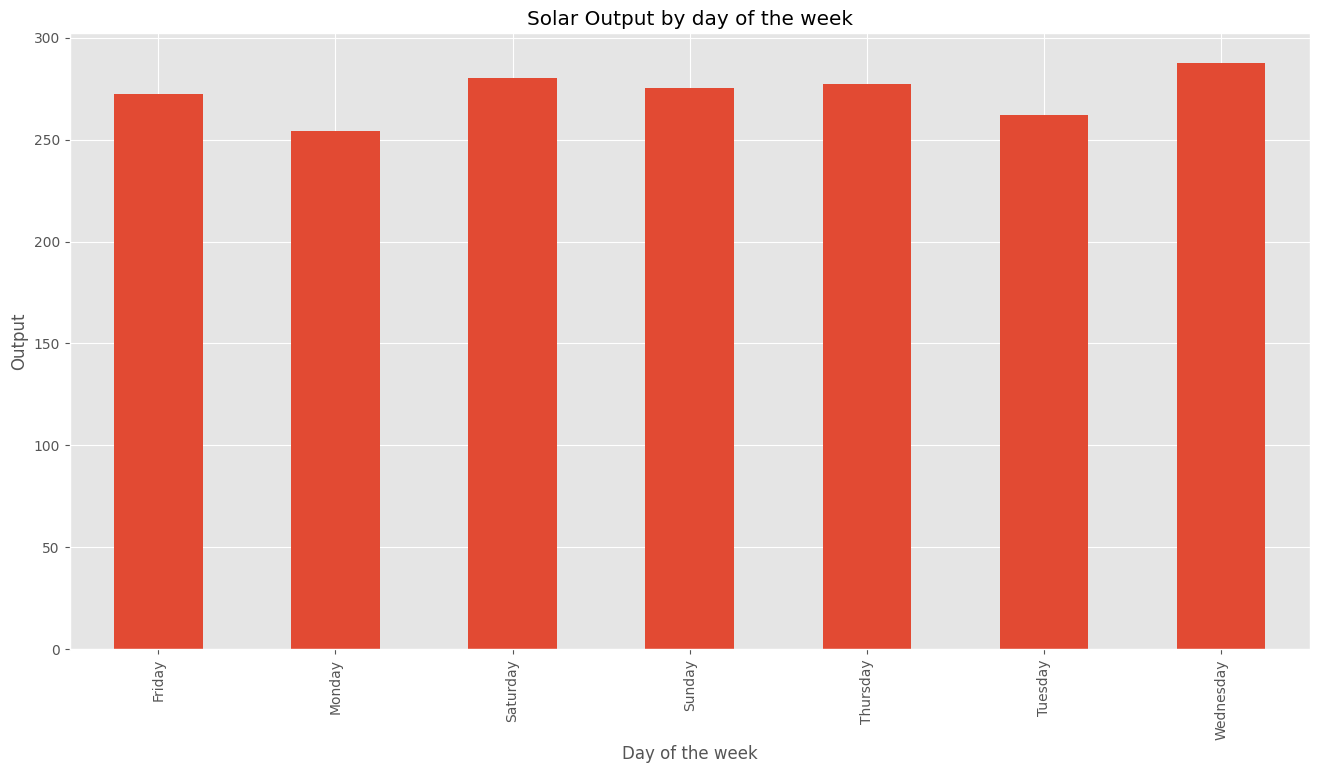

In [21]:
# Solar output by day of the week
dow_df = pd.DataFrame()
dow_df['date'] = data_df.apply(lambda row: str_to_date(row['datetime']), axis=1)
dow_df['dow'] = dow_df['date'].dt.day_name()
dow_df['output'] = data_df['output']
# Output summed by day of the week
dow_df.groupby(by='dow')['output'].sum().plot(kind='bar')
plt.title(f"Solar Output by day of the week")
plt.xlabel(f"Day of the week")
plt.xticks(rotation=90)
plt.ylabel("Output")
plt.show()

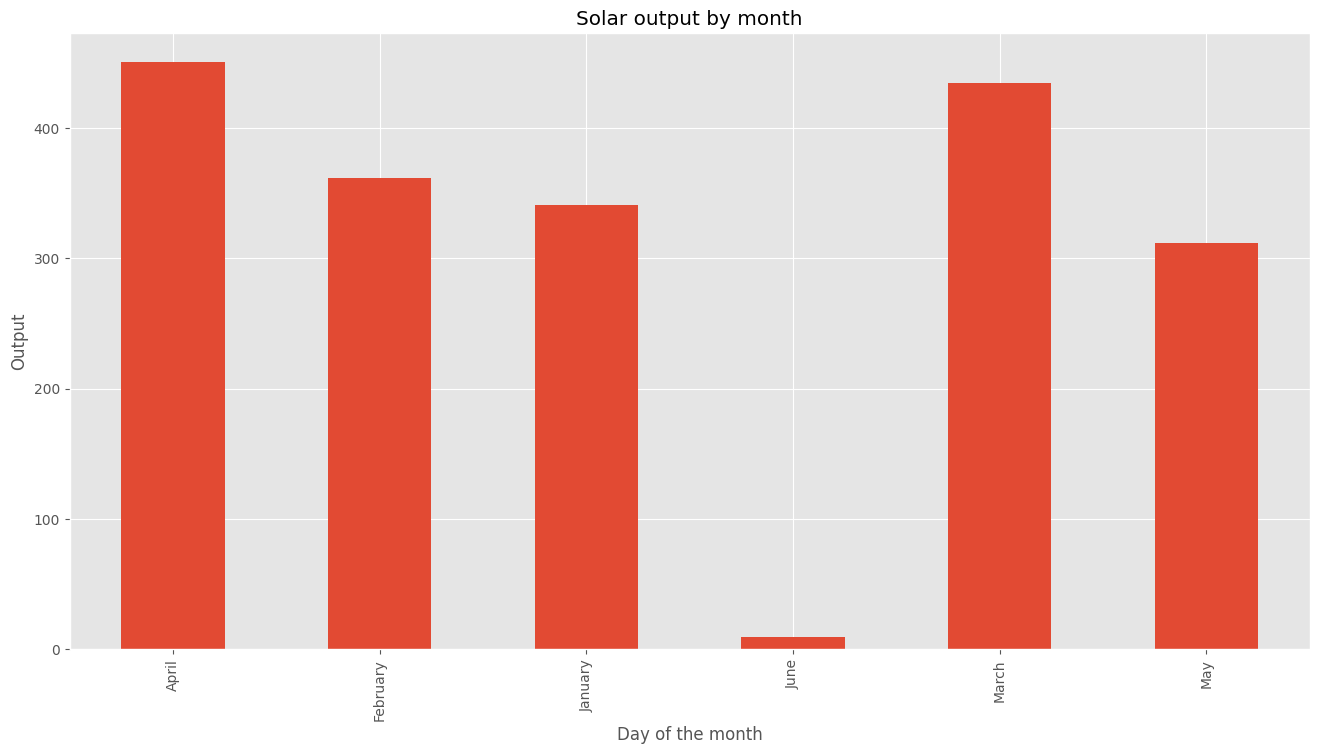

In [22]:
# Solar output by month
dow_df = pd.DataFrame()
dow_df['date'] = data_df.apply(lambda row: str_to_date(row['datetime']), axis=1)
dow_df['month'] = dow_df['date'].dt.month_name()
dow_df['output'] = data_df['output']
# Output summed by day of the week
dow_df.groupby(by='month')['output'].sum().plot(kind='bar')
plt.title(f"Solar output by month")
plt.xlabel(f"Day of the month")
plt.xticks(rotation=90)
plt.ylabel("Output")
plt.show()

## Feature Scaling

- Except precipitation (`precip`), precipitation cover (`precipcover`) and solar time (`solartime`) , other features are in double digit ranges.
- Regardless, z-score normalization should benefit for quicker convergence of gradient descent

In [24]:
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso, LassoCV, Lars, LarsCV, LassoLarsCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

In [25]:
# copy of unnormalized data_df
# Drop the datetime
data_unnorm_df = data_df
numeric_cols = data_df.select_dtypes(include=[np.number]).columns
data_df = data_df[numeric_cols].apply(zscore)
data_df.head(5)

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,solartime,output
0,-1.403946,-0.829721,-1.376138,0.242118,1.004365,-0.293308,-0.6003,-0.451987,-0.883851,-0.680943,-0.651917,-1.509529,-0.281256
1,-0.916350,-1.188969,-1.340224,-0.316047,0.483319,-0.293308,-0.6003,-0.451987,-0.686336,-0.583275,-0.588037,-1.502480,-0.042159
2,-1.322680,-1.787716,-1.735276,-1.127923,0.024799,-0.293308,-0.6003,-0.451987,0.044818,-0.513248,-0.502863,-1.495189,0.017616
3,-1.187236,-2.296651,-2.094413,-1.584603,-0.301724,-0.293308,-0.6003,-0.451987,-0.859595,-0.476393,-0.460277,-1.487654,-0.639903
4,-1.105970,-1.997277,-1.843017,-1.178665,-0.114147,-0.293308,-0.6003,-0.451987,-0.280909,-0.588803,-0.566744,-1.479148,-0.460580


In [26]:
# Another method of normalizing the data i.e. applying Z-score is using StandardScaler - This is just a demonstration and 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_norm = pd.DataFrame(scaler.fit_transform(data_df), columns=data_df.columns)
data_norm.head(5)

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,solartime,output
0,-1.403946,-0.829721,-1.376138,0.242118,1.004365,-0.293308,-0.6003,-0.451987,-0.883851,-0.680943,-0.651917,-1.509529,-0.281256
1,-0.916350,-1.188969,-1.340224,-0.316047,0.483319,-0.293308,-0.6003,-0.451987,-0.686336,-0.583275,-0.588037,-1.502480,-0.042159
2,-1.322680,-1.787716,-1.735276,-1.127923,0.024799,-0.293308,-0.6003,-0.451987,0.044818,-0.513248,-0.502863,-1.495189,0.017616
3,-1.187236,-2.296651,-2.094413,-1.584603,-0.301724,-0.293308,-0.6003,-0.451987,-0.859595,-0.476393,-0.460277,-1.487654,-0.639903
4,-1.105970,-1.997277,-1.843017,-1.178665,-0.114147,-0.293308,-0.6003,-0.451987,-0.280909,-0.588803,-0.566744,-1.479148,-0.460580


In [27]:
# Split data 
X = data_df.drop('output', axis=1)
y = data_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (120, 12)
X_test shape: (31, 12)
y_train shape: (120,)
y_test shape: (31,)


In [28]:
# Try PCA for visualization of input features X
pca_3 = PCA(n_components=3)
pca_3.fit(X)
pca_3.explained_variance_ratio_

array([0.51703249, 0.31315235, 0.04733253])

In [29]:
X_trans = pca_3.transform(X)
df_pca = pd.DataFrame(X_trans, columns=['principal_component_1', 'principal_component_2', 'principal_component_3'])
df_pca.describe()

,principal_component_1,principal_component_2,principal_component_3
count,1.510000e+02,151.000000,1.510000e+02
mean,-1.882232e-16,0.000000,-4.999680e-17
std,2.499150e+00,1.944963,7.561594e-01
min,-2.912994e+00,-3.844026,-2.494044e+00
25%,-1.652764e+00,-1.547267,-4.620818e-01
50%,-7.150055e-01,0.165627,1.158034e-02
75%,2.275732e-01,1.581578,3.697627e-01
max,9.154310e+00,3.415479,2.881221e+00


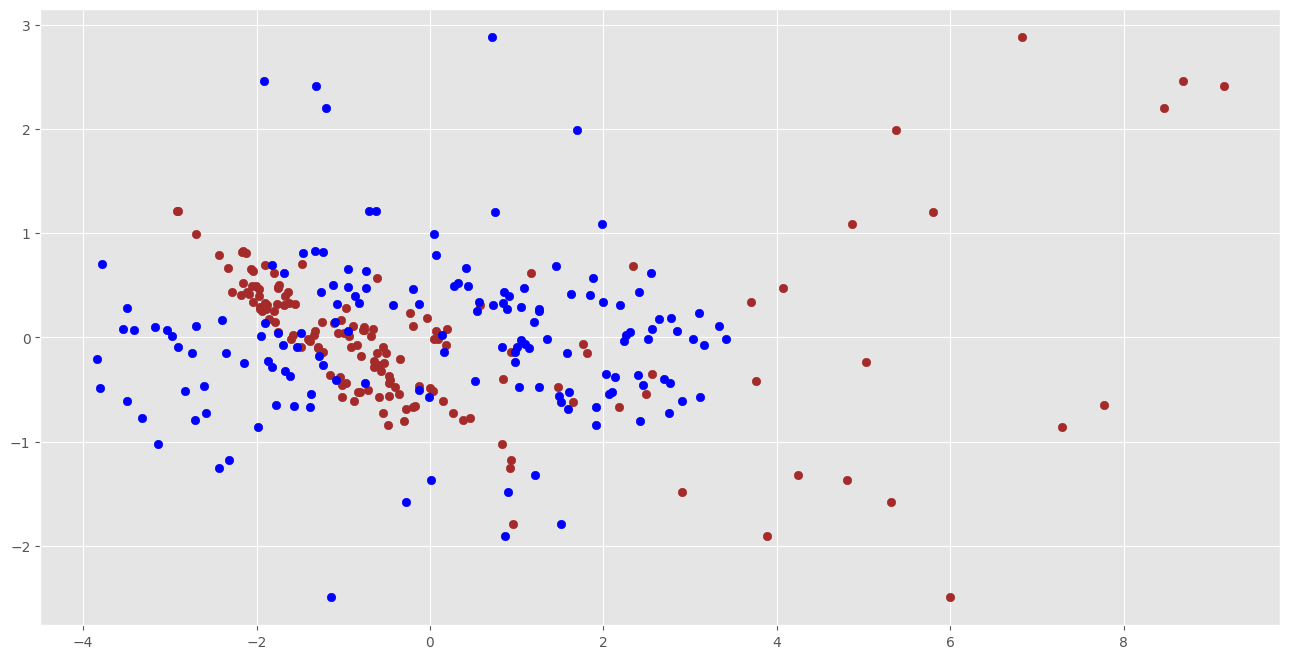

In [30]:
# Relation between pca1 w.r.t pca3 and pca2 w.r.t pca3
plt.scatter(df_pca['principal_component_1'], df_pca['principal_component_3'], c='brown')
plt.scatter(df_pca['principal_component_2'], df_pca['principal_component_3'], c= 'blue')

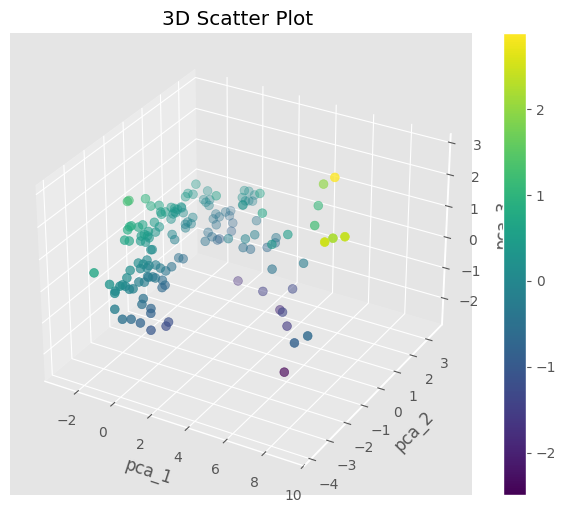

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca['principal_component_1'], df_pca['principal_component_2'], df_pca['principal_component_3'], c=df_pca['principal_component_3'], cmap=sns.color_palette("viridis", as_cmap=True), s=40)
ax.set_xlabel('pca_1')
ax.set_ylabel('pca_2')
ax.set_zlabel('pca_3')
plt.colorbar(scatter)
plt.title('3D Scatter Plot ')
plt.show()

- With PCA, there are couple of clusters visible but do not have strong seggregation
- The data disperses as pca_1 increases

In [59]:
from ParamTester import ParamTester
from ParamTester import predict_and_eval

In [60]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

lin_metrics, lin_y_train_pred, lin_y_test_pred = predict_and_eval(lin_reg, X_train, y_train, X_test, y_test)

Train Mean Squared Error: 0.31151632789793715
Train R-squared: 0.7122062859151108
Test Mean Squared Error: 0.5104518490969554
Test R-squared: 0.2467514789758528


In [61]:
splits = [0.1 , 0.3, 0.2]
for split in splits:
    print(f"-- Current split: {split}")
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=12)
    model = LinearRegression()
    model.fit(X_train, y_train)
    metrics, y_train_pred, y_test_pred = predict_and_eval(model, X_train, y_train, X_test, y_test)

-- Current split: 0.1
Train Mean Squared Error: 0.32364206385071365
Train R-squared: 0.6782979417066
Test Mean Squared Error: 0.4308428072712626
Test R-squared: 0.5118382166208783
-- Current split: 0.3
Train Mean Squared Error: 0.2572947243184856
Train R-squared: 0.7549984570806602
Test Mean Squared Error: 0.619903340790858
Test R-squared: 0.2198546393148313
-- Current split: 0.2
Train Mean Squared Error: 0.31151632789793715
Train R-squared: 0.7122062859151108
Test Mean Squared Error: 0.5104518490969554
Test R-squared: 0.2467514789758528


### Model metrics with variations of train test split

- With 30% split, training score (R2) goes up but test score worsens compared to 20% (MSE goes down for training data while MSE for test data goes up). The model likely has high bias(underfitting).
- With 10% split, training score (R2) goes down but test score improves drastically (MSE goes up for training data while MSE for test data goes down). 
- The default split of 20% seems to be better to proceed.

In [62]:
reg = Ridge(alpha=10)
reg.fit(X_train, y_train)
ridge_metrics, ridge_y_train_pred, ridge_y_test_pred = predict_and_eval(reg, X_train, y_train, X_test, y_test)

Train Mean Squared Error: 0.33510412709918996
Train R-squared: 0.6904147464955743
Test Mean Squared Error: 0.4748387119934952
Test R-squared: 0.2993040221778588


In [63]:
param_info = [
    {
        'name': 'alpha',
        'type': 'float',
        'params': {'random_state' : 0},
        'values': [0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100, 300, 600]
    },
    {        
        'name': 'max_iter',
        'type': 'int',
        'params': {'random_state' : 0},
        'values': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    },
    {        
        'name': 'fit_intercept',
        'type': 'bool',
        'params': {'random_state' : 0},
        'values': [True, False]
    }
]
pt = ParamTester(Ridge, X_train, y_train, X_test, y_test, 0.65)
pt.init_test_params(param_info)
pt.get_attr('param_info')
pt.get_attr('best_params')

NameError: name 'train_r2_threshold' is not defined

In [37]:
pt.run_param_tests()

NameError: name 'pt' is not defined

In [38]:
pt.get_attr('best_params')

NameError: name 'pt' is not defined

#### Observations : Variantions of Ridge/L2 regularisation parameter alpha
- Even though alpha is exponentially higher than starting alpha, the improvement has plateaued around 0.29 for test data
- Learning rate Alpha = 300 seems to have the right balance of train test R2 scores

In [39]:
sgd_reg = SGDRegressor(random_state=0, max_iter=100)
sgd_reg.fit(X_train, y_train)

sgd_metrics, sgd_y_train_pred, sgd_y_test_pred = predict_and_eval(sgd_reg, X_train, y_train, X_test, y_test)

Train Mean Squared Error: 0.3434671431393604
Train R-squared: 0.6826885914545433
Test Mean Squared Error: 0.4736410040101994
Test R-squared: 0.30107142054977665


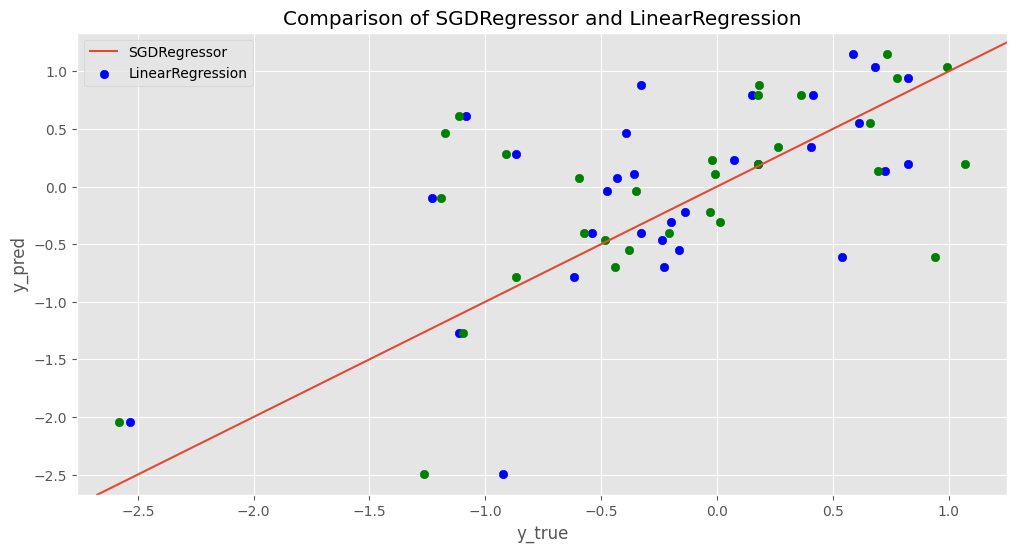

In [40]:
# Plot predictions vs output for test dataset
ax = plt.subplot()
ax.axline((0, 0), slope=1)
plt.scatter(sgd_y_test_pred, y_test,c= 'blue')
plt.scatter(lin_y_test_pred, y_test,c= 'green')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.legend(['SGDRegressor', 'LinearRegression'])
plt.title('Comparison of SGDRegressor and LinearRegression')
plt.show()

In [41]:
# It seems the linear models have high bias(underfitting). Let's try adding more features using PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
X_poly  = poly.fit_transform(X)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [42]:
# linear regression with polynomial features
lin_poly_reg = LinearRegression()
lin_poly_reg.fit(X_poly_train, y_poly_train)
lin_poly_metrics, lin_poly_y_train_pred, lin_poly_y_test_pred = predict_and_eval(lin_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

Train Mean Squared Error: 0.07909369115970363
Train R-squared: 0.9177059475339087
Test Mean Squared Error: 86.59557398261714
Test R-squared: -75.8116358193375


- With degree=2, training score improved significantly but the testing score got worse exponentially
```
Train Mean Squared Error: 0.07909369115970194
Train R-squared: 0.9177059475339104
Test Mean Squared Error: 86.59557398163655
Test R-squared: -75.81163581846769
```
- With degree=3, the testing score got even worse 
```
Train Mean Squared Error: 1.235899138454365e-27
Train R-squared: 1.0
Test Mean Squared Error: 915.9201516191432
Test R-squared: -811.4355771333586
```
- This indicates that with higher degress, there is high variance (overfitting). Regularization should help.

In [43]:
# Let's try Ridge regressor where alpha (regularization factor) can be added
ridge_poly_reg = Ridge(alpha=100, max_iter=100, fit_intercept=True)
ridge_poly_reg.fit(X_poly_train, y_poly_train)
ridge_poly_metrics, ridge_poly_y_train_pred, ridge_poly_y_test_pred = predict_and_eval(ridge_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

Train Mean Squared Error: 0.29780990690076287
Train R-squared: 0.6901398361352569
Test Mean Squared Error: 0.5687953322290465
Test R-squared: 0.4954695961287031


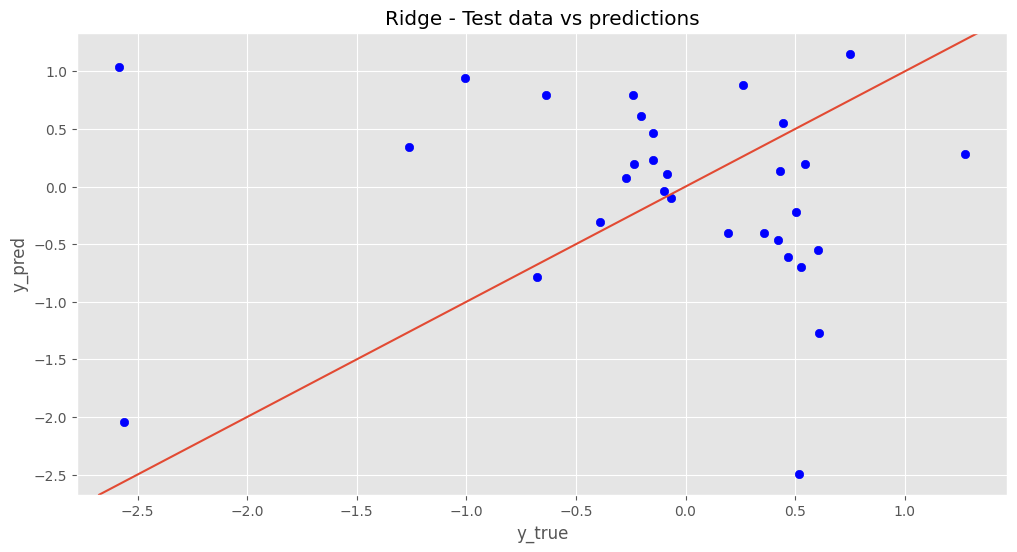

In [44]:
plt.scatter(ridge_poly_y_test_pred, y_test,c= 'blue')
ax = plt.subplot()
ax.axline((0, 0), slope=1)
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Ridge - Test data vs predictions')
plt.show()

In [45]:
param_info = [
    {
        'name': 'alpha',
        'type': 'float',
        'params': {'random_state' : 0},
        'values': [0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60, 100, 300, 600]
    },
    {        
        'name': 'max_iter',
        'type': 'int',
        'params': {'random_state' : 0},
        'values': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    },
    {        
        'name': 'fit_intercept',
        'type': 'bool',
        'params': {'random_state' : 0},
        'values': [True, False]
    }
]
pt = ParamTester(Ridge, X_poly_train, y_poly_train, X_poly_test, y_poly_test)
pt.init_test_params(param_info)
pt.get_attr('param_info')
pt.get_attr('best_params')

NameError: name 'train_r2_threshold' is not defined

In [46]:
pt.run_param_tests()

NameError: name 'pt' is not defined

In [47]:
pt.get_attr('best_params')

NameError: name 'pt' is not defined

- As expected, adding regularisation does help in case of overfitting
- As seen from the above `alpha` variations, the R2 scores for train and test data converge after `alpha` = 60 and start degrading a bit with increasing alpha
- Parameter `max_iter` seems to make not much difference to the R2 score. 
- Similarly, `fit_intercept` = False has miniscule improvement in the R2 score, which can be pratically ignored. 

In [48]:
# Let's try Lasso regressor where alpha (regularization factor) can be added
lasso_poly_reg = Lasso(alpha=0.01, fit_intercept=False, max_iter=10000)
lasso_poly_reg.fit(X_poly_train, y_poly_train)
lass_metrics, lasso_poly_y_train_pred, lasso_poly_y_test_pred = predict_and_eval(lasso_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

Train Mean Squared Error: 0.20885116945617202
Train R-squared: 0.7826981034160253
Test Mean Squared Error: 0.5685826072039438
Test R-squared: 0.4956582865710244


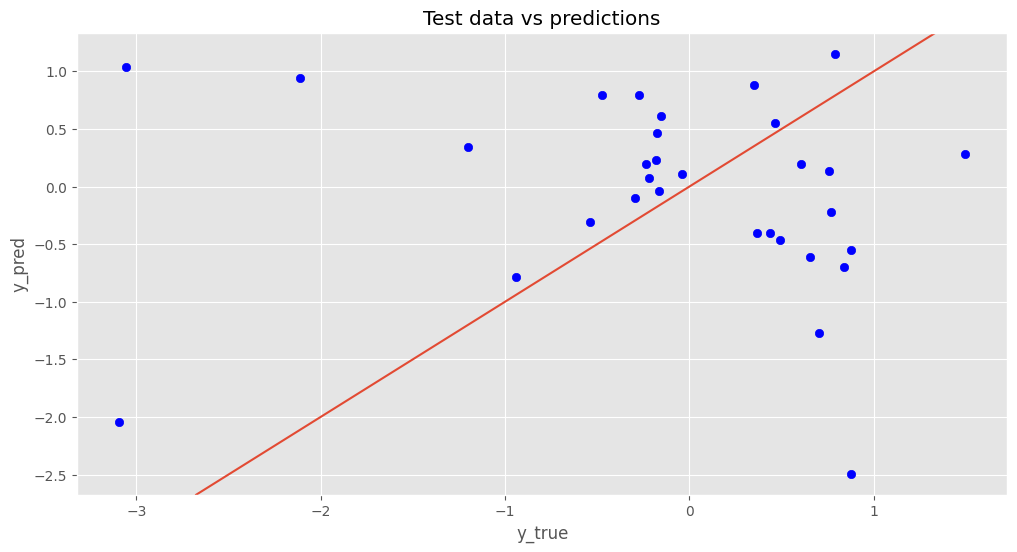

In [49]:
plt.scatter(lasso_poly_y_test_pred, y_test,c= 'blue')
ax = plt.subplot()
ax.axline((0, 0), slope=1)
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.title('Test data vs predictions')
plt.show()

In [50]:
# Let's try Lasso regressor where alpha (regularization factor) and cross-validation both can be applied
lassocv_poly_reg = LassoCV(eps=0.01, cv=5, fit_intercept=False, random_state=12, max_iter=10000)
lassocv_poly_reg.fit(X_poly_train, y_poly_train)
lassocv_metrics, lassocv_poly_y_train_pred, lassocv_poly_y_test_pred = predict_and_eval(lassocv_poly_reg, X_poly_train, y_poly_train, X_poly_test, y_poly_test)

Train Mean Squared Error: 0.338453438024481
Train R-squared: 0.6478517492643469
Test Mean Squared Error: 0.5653933577747301
Test R-squared: 0.49848720096499755


In [51]:
# Let's try a few variations of alpha with LassoCV with default cv = 5
param_info = [
    {
        'name': 'eps',
        'type': 'float',
        'params': {'random_state' : 0},
        'values': [0.001, 0.003, 0.0045, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1,  3, 6, 10]
    },
    {        
        'name': 'max_iter',
        'type': 'int',
        'params': {'random_state' : 0},
        'values': [1000, 2000, 5000, 10000, 20000, 30000, 50000, 100000]
    }
]
pt = ParamTester(LassoCV, X_poly_train, y_poly_train, X_poly_test, y_poly_test)
pt.init_test_params(param_info)
pt.get_attr('param_info')
pt.get_attr('best_params')
pt.run_param_tests()

NameError: name 'train_r2_threshold' is not defined

In [50]:
pt.get_attr('best_params')

Current best parameters:
eps: 0.1
max_iter: 200


- With polynomial freatures, Ridge and LassoCV have generated better outcomes than before.
- However, in both cases the R2 scores plateau around 50%

With linear regression, the test data still reached barely 50% accuracy. Regardless, let's check the predictions with Ridge and Lasso models 

In [52]:
# read new features for prediction
june_weather_df = pd.read_csv('june_weather_data.csv')
# Drop unused columns
june_weather_df = june_weather_df.drop(['name', 'feelslikemax', 'feelslikemin','feelslike', 'severerisk','moonphase', 'icon', 'stations', 'description', 'preciptype', 'winddir', 'sealevelpressure', 'visibility','uvindex', 'snow', 'snowdepth', 'windgust', 'windspeed', 'conditions'], axis=1)
june_weather_df.isnull().sum()

datetime          0
tempmax           0
tempmin           0
temp              0
dew               0
humidity          0
precip            0
precipprob        0
precipcover       0
cloudcover        0
solarradiation    0
solarenergy       0
sunrise           0
sunset            0
dtype: int64

In [53]:
june_weather_df['solartime'] = june_weather_df.apply(lambda row: tm_diff_min(row['sunset'], row['sunrise']), axis=1)
# Now sunrise and sunset times can be dropped
june_weather_df = june_weather_df.drop(['sunrise', 'sunset'], axis=1)

In [54]:
numeric_cols = june_weather_df.select_dtypes(include=[np.number]).columns
june_data_df = june_weather_df[numeric_cols].apply(zscore)
june_data_df.head(5)

,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,cloudcover,solarradiation,solarenergy,solartime
0,1.126050,0.602947,1.110927,0.204576,-1.702219,-0.532928,0.583139,-0.119175,-0.936234,0.706614,0.705069,-2.552363
1,1.305147,1.440574,1.484817,0.308658,-2.299670,-0.562243,0.583139,0.062862,-0.866468,0.448750,0.427445,-2.182930
2,-0.008234,-0.129977,-0.073059,0.308658,0.388858,0.334798,0.583139,-0.846885,-0.622285,0.174173,0.149821,-1.857478
3,1.364846,-2.328747,0.487776,0.100493,-0.731362,-0.321859,0.583139,-0.301212,-2.942022,0.985966,0.982693,-1.549617
4,1.663342,0.812354,0.923982,0.829071,-0.706468,0.276168,0.583139,-1.028485,-2.250170,1.011036,1.024336,-1.241756


In [55]:
# Apply polynomial features similar to the training data
june_poly_df  = poly.fit_transform(june_data_df)
ridge_poly = Ridge(alpha=60, max_iter=100, fit_intercept=False)
ridge_poly.fit(X_poly_train, y_poly_train)
june_preds_ridge = ridge_poly.predict(june_poly_df)
lassocv_poly = LassoCV(eps=0.1, cv=5, fit_intercept=False, random_state=0, max_iter=200)
lassocv_poly.fit(X_poly_train, y_poly_train)
june_preds_lasso = lassocv_poly.predict(june_poly_df)

In [56]:
# Use scaler based on original solar output to reverse transform predictions
jscaler = StandardScaler()
jscaler.fit_transform(pd.DataFrame(solar_df['Daily yield(kWh)']))
result_df = pd.DataFrame(june_weather_df['datetime'])
result_df['ridge_pred'] = jscaler.inverse_transform(pd.DataFrame(june_preds_ridge))
result_df['lasso_pred'] = jscaler.inverse_transform(pd.DataFrame(june_preds_lasso))
result_df

,datetime,ridge_pred,lasso_pred
0,2025-06-02,11.843253,14.095915
1,2025-06-03,12.154014,13.954888
2,2025-06-04,11.814068,12.866123
3,2025-06-05,14.197929,14.789349
4,2025-06-06,14.955987,14.972725
5,2025-06-07,13.071818,13.528291
6,2025-06-08,14.396636,14.351860
7,2025-06-09,14.432276,13.882986
8,2025-06-10,15.339601,14.642911
9,2025-06-11,13.850518,14.215766


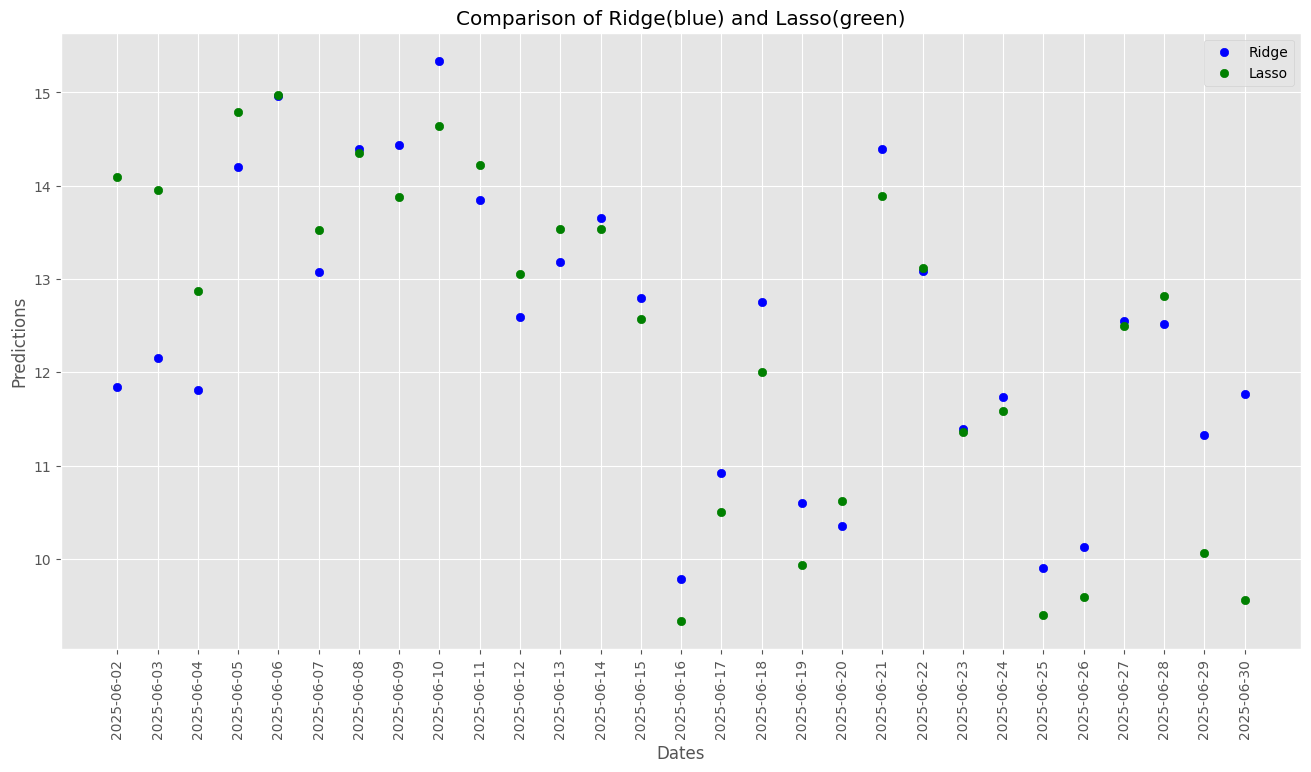

In [57]:
# Plot predictions vs output
plt.scatter(result_df['datetime'], result_df['ridge_pred'], c= 'blue')
plt.scatter(result_df['datetime'], result_df['lasso_pred'], c= 'green')
plt.legend(['Ridge', 'Lasso'])
plt.xlabel('Dates')
plt.ylabel('Predictions')
plt.xticks(rotation=90)
plt.title('Comparison of Ridge(blue) and Lasso(green)')
plt.show()

### Observations:
- Ridge (L2 regularization) shows better predictions, possibly because the it does not zero out some features as opposed to Lasso.
- Eyeballing the prections also indicates that Ridge predictions are likely to be more inline with original data.

Best R2 score seen with Ridge
```
-- Ridge with alpha  10
Train Mean Squared Error: 0.2046861760712266
Train R-squared: 0.7870316245744897
Test Mean Squared Error: 0.5849537151710029
Test R-squared: 0.481136856372095
```

Best R2 score seen with LassoCV
```
-- LassoCV with alpha  0.0045
Train Mean Squared Error: 0.19926141784116985
Train R-squared: 0.7926758843359761
Test Mean Squared Error: 0.5892187963695298
Test R-squared: 0.4773536622815181
```